In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import random
import pandas as pd
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
from pathlib import Path
from cv2 import resize
import os
from PIL import Image

In [2]:
# parallel computing in case we run model
import tensorflow as tf
import keras
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-pack

In [3]:
df = pd.read_excel (r'../data/train/T2_Files_12.2.20.xlsx')
print (df)
bad_phoneme_wav=df[df["Class"]=="B"]
good_phoneme_wav=df[df["Class"]=="G"]

              Wav filename Class              Spectrograms file Phoneme  \
0     2_101532_2666_477311     B  B_T2_1_4_2_101532_2666_477311      T2   
1     2_101467_2692_362872     B  B_T2_1_1_2_101467_2692_362872      T2   
2     2_101535_2675_768539     G  G_T2_1_3_2_101535_2675_768539      T2   
3     2_100751_2671_133223     G  G_T2_1_4_2_100751_2671_133223      T2   
4     2_101465_2681_759419     B  B_T2_1_1_2_101465_2681_759419      T2   
...                    ...   ...                            ...     ...   
1692  2_101416_2685_703019     G  G_T2_1_3_2_101416_2685_703019      T2   
1693  2_101458_2653_635101     G  G_T2_1_1_2_101458_2653_635101      T2   
1694  2_101458_2653_586560     G  G_T2_1_1_2_101458_2653_586560      T2   
1695  2_101458_2653_525830     G  G_T2_1_1_2_101458_2653_525830      T2   
1696  2_101546_2706_586720     G  G_T2_1_8_2_101546_2706_586720      T2   

      Word Numeratr  Phoneme Numerator  Language  WordID  UserID  
0                 1             

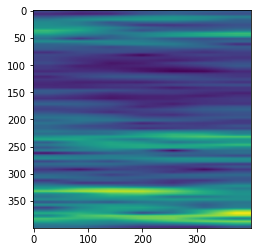

In [4]:
img=mpimg.imread('../data/train/classification/Bad/B_T2_1_1_2_101461_2653_794248.png')
img_rescale=resize(img,(400,400))
plt.imshow(img_rescale)

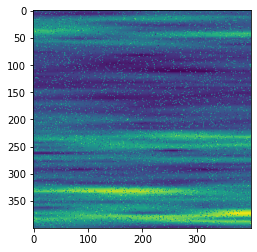

In [5]:
# random noise
img_nos=random_noise(img_rescale,mode='s&p',clip=True) 
plt.imshow(img_nos)
# mpimg.imsave("noise",img_nos)

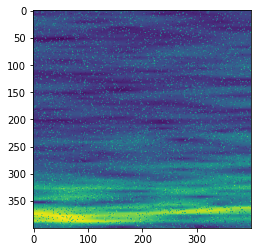

In [6]:
pathlist = Path('../data/train/classification/Bad/').rglob('*.png')
i=0
for path in pathlist:
    path_in_str = "../data/train/pepper_and_sault_spectrogram/bad/"
    plt.imshow(img_nos)
    img=mpimg.imread(str(path))
    img_rescale=resize(img,(400,400))
    img_nos=random_noise(img_rescale,mode='s&p',clip=True)
    mpimg.imsave(path_in_str+str(i)+'_noise.png',img_nos)
    img = Image.open(path_in_str+str(i)+'_noise.png').convert('LA')
    img.save(path_in_str+str(i)+'_noise.png')
    i+=1

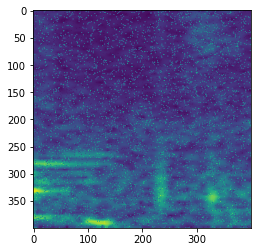

In [7]:
pathlist = Path('../data/train/classification/Good/').rglob('*.png')
i=0
for path in pathlist:
    path_in_str = "../data/train/pepper_and_sault_spectrogram/good/"
    plt.imshow(img_nos)
    img=mpimg.imread(str(path))
    img_rescale=resize(img,(400,400))
    img_nos=random_noise(img_rescale,mode='s&p',clip=True)
    mpimg.imsave(path_in_str+str(i)+'_noise.png',img_nos)
    img = Image.open(path_in_str+str(i)+'_noise.png').convert('LA')
    img.save(path_in_str+str(i)+'_noise.png')
    i+=1